In [461]:
import pandas as pd
import numpy as np

## **About Dataset**
This dataset is designed for predicting food delivery times based on various influencing factors such as distance, weather, traffic conditions, and time of day. It offers a practical and engaging challenge for machine learning practitioners, especially those interested in logistics and operations research.

**Key Features:**

**Order_ID:** Unique identifier for each order.

**Distance_km:** The delivery distance in kilometers.

**Weather:** Weather conditions during the delivery, including Clear, Rainy, Snowy, Foggy, and Windy.

**Traffic_Level:** Traffic conditions categorized as Low, Medium, or High.

**Time_of_Day:** The time when the delivery took place, categorized as Morning, Afternoon, Evening, or Night.

**Vehicle_Type:** Type of vehicle used for delivery, including Bike, Scooter, and Car.

**Preparation_Time_min:** The time required to prepare the order, measured in minutes.

**Courier_Experience_yrs:** Experience of the courier in years.

**Delivery_Time_min:** The total delivery time in minutes (target variable).

In [462]:
df = pd.read_csv('/content/Food_Delivery_Times.csv')
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [463]:
df.shape

(1000, 9)

#### **By this we can say that the data has the**
#### **9 ---> Column**
#### **1000 ---> Row**

In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


### **From this we can say that**

2.   **Weather**       

3.   **Traffic_Level**

4.   **Time_of_Day**  

5.   **Vehicle_Type**

**this are the categorical values and we have to transform it**

In [465]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


#### This provide the infomation about the quartile range that provide th idea about how many values are below which value of data and the centre of tendency of the data and the count gives the idea about the how many vlaues are missing from the data like **Courier_Experience_yrs has 30 missing values.**

## **Checking missing values in columns.**

In [466]:
df.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


Identifying the pattern of missing value

In [467]:
missing_percentage = ((df.isnull().sum())/len(df))*100

print(missing_percentage)

Order_ID                  0.0
Distance_km               0.0
Weather                   3.0
Traffic_Level             3.0
Time_of_Day               3.0
Vehicle_Type              0.0
Preparation_Time_min      0.0
Courier_Experience_yrs    3.0
Delivery_Time_min         0.0
dtype: float64


Only the **3%** of data is missing so that it is safe to fill the missing the data like standardly we follow that

* If **missing-values <= 5%** ---> it is safe to **fill the missing values.**
* If **missing-values >= 50%** ---> it is best to **remove the missing values.**

the removing the data is totaly depend on the domain knowledge of the dataset and importantance of the data.

We can say that there are 30 values that are missing from the
1. Weather                -------> Categorical
2. Traffic_Level          -------> Categorical
3. Time_of_day            -------> Categorical
4. Courier-Experience_yrs -------> Float



### **Lets check for the unique values in the data like here weather, traffic-lvl, time_of_day and Vehicle_Type is already a categorical value so we will check for the unique values for the relavant features.**

In [468]:
df.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

In [469]:
print('Weather: ', df.Weather.unique())
print('\nTraffic_Level: ', df.Traffic_Level.unique())
print('\nTimeofDay: ', df.Time_of_Day.unique())
print('\nCourier_Experience_yrs: ', df.Courier_Experience_yrs.unique())
print('\nDistance_km: ', df.Distance_km.unique())
print('\nVehicle_Type: ', df.Vehicle_Type.unique())
# print('Delivery_Time_min: ', df.Delivery_Time_min.unique()) there is no need for the target variable beacause we dont need to transform that

Weather:  ['Windy' 'Clear' 'Foggy' 'Rainy' 'Snowy' nan]

Traffic_Level:  ['Low' 'Medium' 'High' nan]

TimeofDay:  ['Afternoon' 'Evening' 'Night' 'Morning' nan]

Courier_Experience_yrs:  [ 1.  2.  5.  9.  6.  4.  7. nan  3.  8.  0.]

Distance_km:  [ 7.93 16.42  9.52  7.44 19.03 19.4  17.39  1.78 10.62 16.86 15.54 10.89
  4.69  2.8   2.17 17.86  2.53  6.58  5.38 15.56 13.08  0.86  5.83 11.2
 14.59 12.91 13.92  4.04 18.05 12.88 19.45  4.58 19.73  2.47 17.8   5.96
 12.85  1.02  6.84  8.68 10.69  0.99  1.11  2.16 13.17  8.79  5.93  2.09
  7.57 10.52  4.83 19.81 10.1   7.64 12.35  5.9   0.9  11.58 16.16 15.51
 12.16  4.96  3.64  2.85 10.4  12.31  3.53 13.6  15.23  4.17  3.21  6.38
 16.54 12.02 11.94  9.08  3.46  6.8  17.38  3.25 10.28 16.14  3.55 10.65
  7.3   7.03 12.43 12.76 11.39 19.41  8.32  1.92  1.15  7.46  7.25 16.7
 17.2  18.76  9.22  2.84 17.59 14.89  1.3  18.99  1.6   8.26 10.16 12.03
 14.73 12.56  5.53 10.18 15.5   2.98 16.69 11.22  8.53 12.49  0.97 12.6
  6.91 18.97  4.05 14.29 1

### **By this we are geeting the idea that the distance_km is not the categorical value but we can also can treat the Courier_Experience_yrs as the categorical value so we have to transform that.**

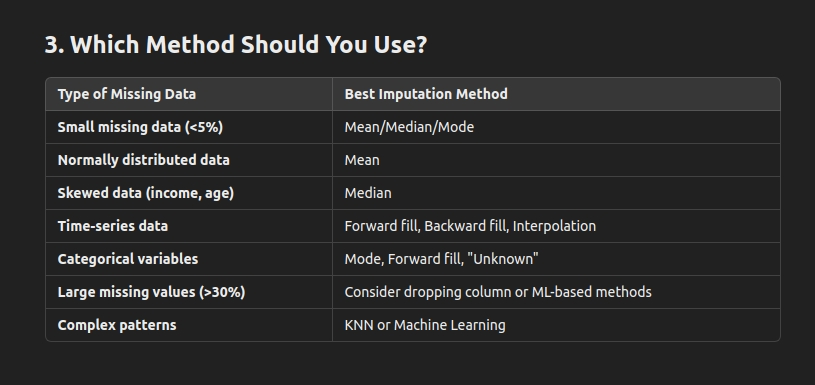

We will check the complexity of missing value pattern of complexity for appplying the best method to fill the missing value.

By ploting the heatmap of the missing.

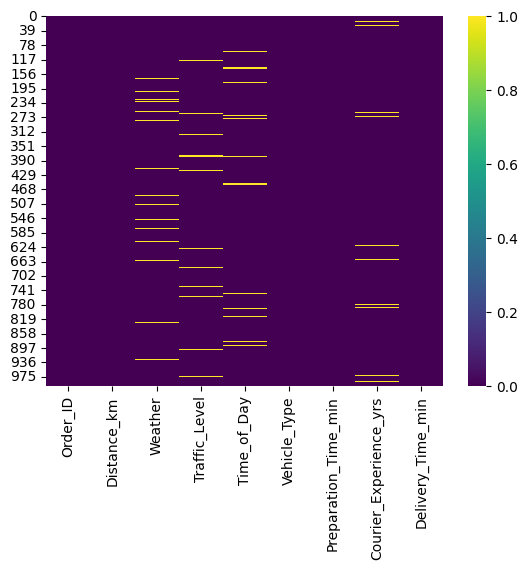

In [470]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.isnull(), cmap='viridis', cbar=True)
plt.show()

It is suggesting he simple pattern so we will use the simple method to fill the values of the data.

### **Fixing the missing value and performing the encoding.**

In [471]:
df.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


### **Fixing the Weather nan values.**

In [472]:
df.Weather.fillna(df.Weather.mode()[0], inplace=True)

<ipython-input-472-464bfc8e1ea7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Weather.fillna(df.Weather.mode()[0], inplace=True)


In [473]:
df.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,0
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


In [474]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [475]:
#Fixing the missing value of Traffic_level column
df.Traffic_Level.fillna(df.Traffic_Level.mode()[0], inplace=True)

<ipython-input-475-5dfe3cdf5bb9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Traffic_Level.fillna(df.Traffic_Level.mode()[0], inplace=True)


In [476]:
df.Time_of_Day.fillna(df.Time_of_Day.mode()[0], inplace=True)

<ipython-input-476-491d6f609033>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Time_of_Day.fillna(df.Time_of_Day.mode()[0], inplace=True)


In [477]:
df.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,0
Traffic_Level,0
Time_of_Day,0
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


In [478]:
df.Courier_Experience_yrs.describe()

,Courier_Experience_yrs
count,970.000000
mean,4.579381
std,2.914394
min,0.000000
25%,2.000000
50%,5.000000
75%,7.000000
max,9.000000


In [479]:
df.Courier_Experience_yrs.mode()

,Courier_Experience_yrs
0,6.0


### **From the heat map we can see that the spread is on very random so the pattern of missing value is simple so we can replace with the mode replacement of the nan value**

In [480]:
df.Courier_Experience_yrs.fillna(df.Courier_Experience_yrs.mode()[0], inplace=True)

<ipython-input-480-28b5814c5a62>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Courier_Experience_yrs.fillna(df.Courier_Experience_yrs.mode()[0], inplace=True)


In [481]:
df.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,0
Traffic_Level,0
Time_of_Day,0
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,0
Delivery_Time_min,0


### **Outliers removing.**

In [482]:
df.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

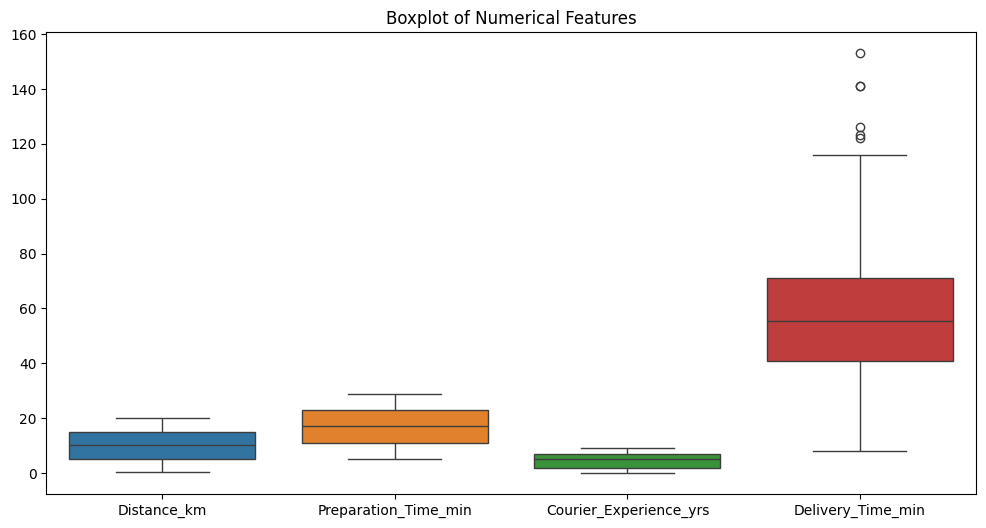

In [483]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["Distance_km", "Preparation_Time_min", "Courier_Experience_yrs", "Delivery_Time_min"]])
plt.title("Boxplot of Numerical Features")
plt.show()

In [484]:
#checking if any null value is present.
df['Delivery_Time_min'].isnull().sum()

0

In [485]:
# Geeting the idea about delivery time min
df.Delivery_Time_min.describe()

,Delivery_Time_min
count,1000.000000
mean,56.732000
std,22.070915
min,8.000000
25%,41.000000
50%,55.500000
75%,71.000000
max,153.000000


In [486]:
# Geeting the IQR measures is it according to the describe statement or not
Q1 = df['Delivery_Time_min'].quantile(0.25)
Q3 = df['Delivery_Time_min'].quantile(0.75)
print(Q1, Q3)
IQR = Q3-Q1

lowerf = Q1 - 1.5*IQR
print(lowerf)
higherf = Q3 + 1.5*IQR
print(higherf)

outliers = df[(df['Delivery_Time_min'] < lowerf) | (df['Delivery_Time_min'] > higherf)]
outliers

41.0 71.0
-4.0
116.0


,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
29,948,18.05,Clear,Medium,Evening,Scooter,10,7.0,123
127,446,18.97,Clear,Low,Evening,Car,25,4.0,141
379,814,18.46,Clear,Medium,Morning,Scooter,29,1.0,153
452,394,15.64,Rainy,Low,Morning,Bike,20,4.0,141
784,385,14.83,Rainy,Low,Morning,Car,19,4.0,126
924,428,17.81,Windy,High,Evening,Bike,21,4.0,122


### **Distribution of Delivery_Time-min**

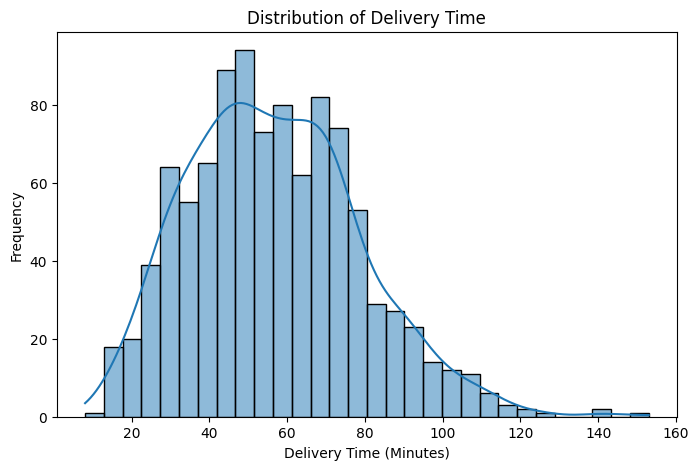

In [487]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Delivery_Time_min"], bins=30, kde=True)
plt.title("Distribution of Delivery Time")
plt.xlabel("Delivery Time (Minutes)")
plt.ylabel("Frequency")
plt.show()

**Now here we will perform the trimming because if we performe the capping the extreme values are replace by the higher fence of the data and because of that when ever the new extreme values will expose to the model it will provide the improper delivery_time_min which is not good. So it is better to remove that datapoints. Because here we are not doing the anomaly detection. That is my assumence.**

### **Peforming the Trimming**

In [488]:
df =  df[(df['Delivery_Time_min'] > lowerf) & (df['Delivery_Time_min'] < higherf)]

In [489]:
df.shape

(992, 9)

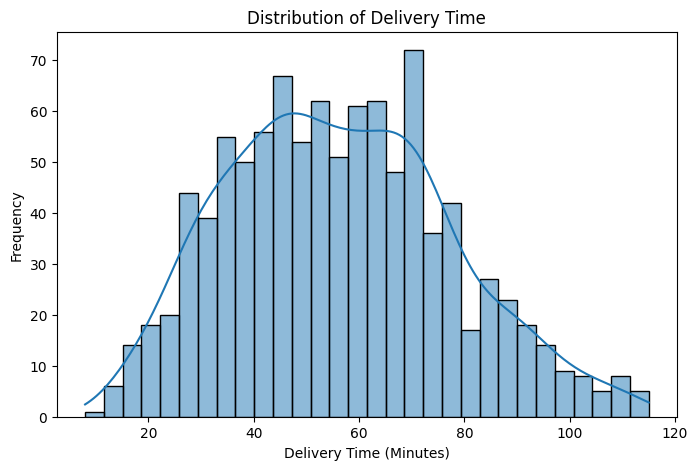

In [490]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Delivery_Time_min"], bins=30, kde=True)
plt.title("Distribution of Delivery Time")
plt.xlabel("Delivery Time (Minutes)")
plt.ylabel("Frequency")
plt.show()

## **Data distribution using histograms, box plots, and KDE plots.**

In [491]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import pylab
%matplotlib inline

In [492]:
df.dtypes

,0
Order_ID,int64
Distance_km,float64
Weather,object
Traffic_Level,object
Time_of_Day,object
Vehicle_Type,object
Preparation_Time_min,int64
Courier_Experience_yrs,float64
Delivery_Time_min,int64


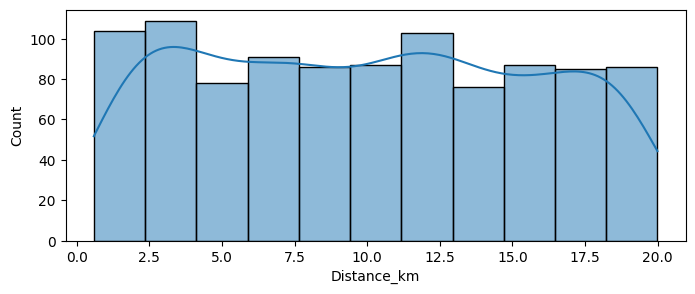

In [493]:
plt.figure(figsize=(8,3))
sns.histplot(data=df, x='Distance_km', kde=True)
plt.show()

In [494]:
print(df["Distance_km"].skew())  # If >0, right-skewed; <0, left-skewed
print(df["Distance_km"].kurt())  # High values mean heavy tails

0.048550562955298956
-1.2209733506250608


### **So, the data is very less right skewed but I have used tried all the transformation technique to make the distributin like gaussian distribution but the transformation either making it more right skewed or wither making it more left skewed.**



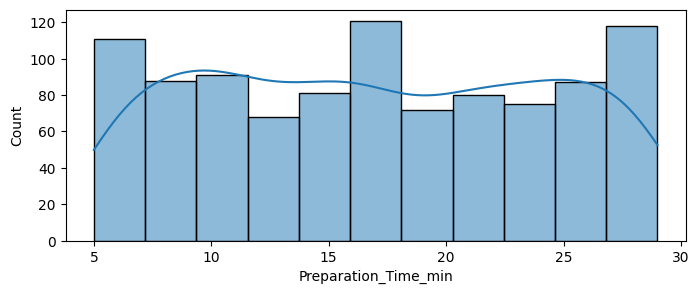

In [495]:
plt.figure(figsize=(8,3))
sns.histplot(data=df, x='Preparation_Time_min', kde=True)
plt.show()

In [496]:
print(df["Preparation_Time_min"].skew())  # If >0, right-skewed; <0, left-skewed
print(df["Preparation_Time_min"].kurt())  # High values mean heavy tails


0.032456083047278664
-1.239089954038444


In [497]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                992 non-null    int64  
 1   Distance_km             992 non-null    float64
 2   Weather                 992 non-null    object 
 3   Traffic_Level           992 non-null    object 
 4   Time_of_Day             992 non-null    object 
 5   Vehicle_Type            992 non-null    object 
 6   Preparation_Time_min    992 non-null    int64  
 7   Courier_Experience_yrs  992 non-null    float64
 8   Delivery_Time_min       992 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 77.5+ KB


### **Correlation**

we will check for the realtion ship between the numerical values

In [498]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


                      Order_ID  Distance_km  Preparation_Time_min  \
Order_ID              1.000000    -0.027012             -0.036120   
Distance_km          -0.027012     1.000000             -0.012264   
Preparation_Time_min -0.036120    -0.012264              1.000000   
Delivery_Time_min    -0.035881     0.794559              0.312277   

                      Delivery_Time_min  
Order_ID                      -0.035881  
Distance_km                    0.794559  
Preparation_Time_min           0.312277  
Delivery_Time_min              1.000000  


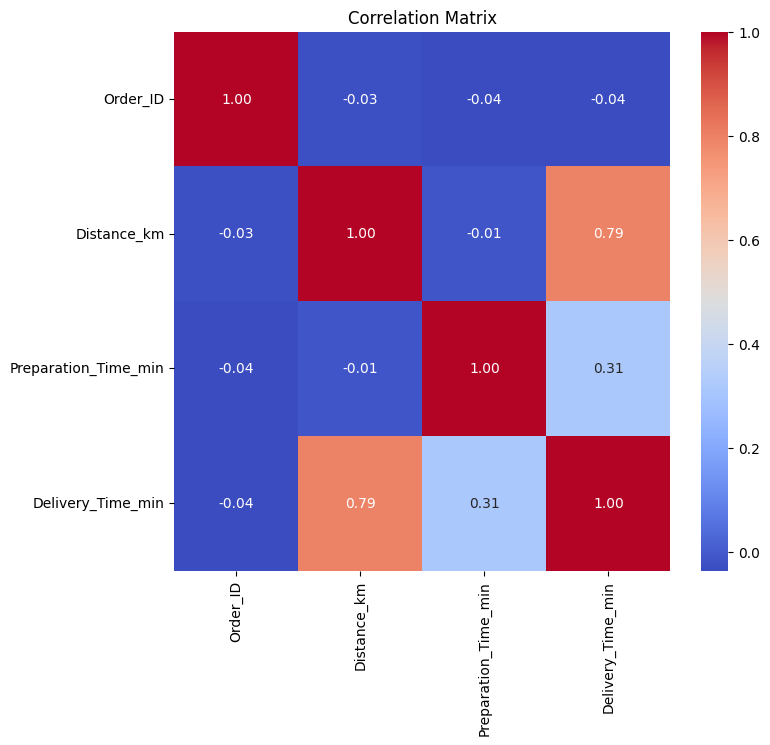

In [499]:
numeric_df = df.drop(['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type', 'Courier_Experience_yrs'], axis=1)
corr = numeric_df.corr()

print(corr)

plt.figure(figsize=(8, 7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

from this we can have the idea that the order id is not showing an impact on the dataset it has the very weak correaltion with the target variable like this.

Order_ID vs. Delivery_Time_min = -0.04 (almost zero) very less value than other so we will remove that.


In [500]:
df.drop('Order_ID', axis=1, inplace=True)
df.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,19.03,Clear,Low,Morning,Bike,16,5.0,68


### **Encoding**

In [501]:
#encoding for the Weather

df.Weather.unique()

array(['Windy', 'Clear', 'Foggy', 'Rainy', 'Snowy'], dtype=object)

In [502]:
# Here we will perfrom the one hot encoding because the values are not visualizing he rank
df_city = pd.get_dummies(df['Weather'], dtype='int64', drop_first=True)
df_city.head()

,Foggy,Rainy,Snowy,Windy
0,0,0,0,1
1,0,0,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,0,0


In [503]:
df = pd.concat([df, df_city], axis=1)
df.drop('Weather', axis=1, inplace=True)
df.head(5)

,Distance_km,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Foggy,Rainy,Snowy,Windy
0,7.93,Low,Afternoon,Scooter,12,1.0,43,0,0,0,1
1,16.42,Medium,Evening,Bike,20,2.0,84,0,0,0,0
2,9.52,Low,Night,Scooter,28,1.0,59,1,0,0,0
3,7.44,Medium,Afternoon,Scooter,5,1.0,37,0,1,0,0
4,19.03,Low,Morning,Bike,16,5.0,68,0,0,0,0


In [504]:
#the unique values and counts of that

df.Traffic_Level.unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [505]:
#Now for the Traffic Level label encoding because low-med-high driving the ranking here.

df.Traffic_Level = df.Traffic_Level.map({'Low': 0, 'Medium': 1, 'High': 2})
df.head()

,Distance_km,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Foggy,Rainy,Snowy,Windy
0,7.93,0,Afternoon,Scooter,12,1.0,43,0,0,0,1
1,16.42,1,Evening,Bike,20,2.0,84,0,0,0,0
2,9.52,0,Night,Scooter,28,1.0,59,1,0,0,0
3,7.44,1,Afternoon,Scooter,5,1.0,37,0,1,0,0
4,19.03,0,Morning,Bike,16,5.0,68,0,0,0,0


In [506]:
# now for vechile type

df_vehicle = pd.get_dummies(df['Vehicle_Type'], dtype=int, drop_first=True)
df_vehicle

,Car,Scooter
0,0,1
1,0,0
2,0,1
3,0,1
4,0,0
...,...,...
995,1,0
996,0,1
997,0,1
998,0,0


In [507]:
df = pd.concat([df, df_vehicle], axis=1)
df.drop('Vehicle_Type', axis=1, inplace=True)
df.head()

,Distance_km,Traffic_Level,Time_of_Day,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Foggy,Rainy,Snowy,Windy,Car,Scooter
0,7.93,0,Afternoon,12,1.0,43,0,0,0,1,0,1
1,16.42,1,Evening,20,2.0,84,0,0,0,0,0,0
2,9.52,0,Night,28,1.0,59,1,0,0,0,0,1
3,7.44,1,Afternoon,5,1.0,37,0,1,0,0,0,1
4,19.03,0,Morning,16,5.0,68,0,0,0,0,0,0


In [508]:
#Lets handle the Time_of_Day

df.Time_of_Day.value_counts()

,count
Time_of_Day,
Morning,335
Evening,288
Afternoon,284
Night,85


In [509]:
# one hot encoding
df_timofday = pd.get_dummies(df.Time_of_Day, dtype=int, drop_first=True)
df_timofday

,Evening,Morning,Night
0,0,0,0
1,1,0,0
2,0,0,1
3,0,0,0
4,0,1,0
...,...,...,...
995,1,0,0
996,0,1,0
997,1,0,0
998,0,0,0


In [510]:
df = pd.concat([df, df_timofday], axis=1)
df.drop('Time_of_Day', axis=1, inplace=True)
df.head()

,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Foggy,Rainy,Snowy,Windy,Car,Scooter,Evening,Morning,Night
0,7.93,0,12,1.0,43,0,0,0,1,0,1,0,0,0
1,16.42,1,20,2.0,84,0,0,0,0,0,0,1,0,0
2,9.52,0,28,1.0,59,1,0,0,0,0,1,0,0,1
3,7.44,1,5,1.0,37,0,1,0,0,0,1,0,0,0
4,19.03,0,16,5.0,68,0,0,0,0,0,0,0,1,0


In [511]:
# Unique value of courier experience yr.

df.Courier_Experience_yrs.unique()

array([1., 2., 5., 9., 6., 4., 7., 3., 8., 0.])

In [512]:
# We will also perform the label encoding for the courier exprience yrs because it deriving the ranking here.

df.Courier_Experience_yrs = df.Courier_Experience_yrs.map({1.0: 1, 2.0: 2, 5.0: 5, 9.0: 9, 6.0: 6, 4.0: 4, 7.0: 7, 3.0: 3, 8.0: 8, 0.0: 0})

In [513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance_km             992 non-null    float64
 1   Traffic_Level           992 non-null    int64  
 2   Preparation_Time_min    992 non-null    int64  
 3   Courier_Experience_yrs  992 non-null    int64  
 4   Delivery_Time_min       992 non-null    int64  
 5   Foggy                   992 non-null    int64  
 6   Rainy                   992 non-null    int64  
 7   Snowy                   992 non-null    int64  
 8   Windy                   992 non-null    int64  
 9   Car                     992 non-null    int64  
 10  Scooter                 992 non-null    int64  
 11  Evening                 992 non-null    int64  
 12  Morning                 992 non-null    int64  
 13  Night                   992 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 116.2 KB

In [514]:
df.head()

,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Foggy,Rainy,Snowy,Windy,Car,Scooter,Evening,Morning,Night
0,7.93,0,12,1,43,0,0,0,1,0,1,0,0,0
1,16.42,1,20,2,84,0,0,0,0,0,0,1,0,0
2,9.52,0,28,1,59,1,0,0,0,0,1,0,0,1
3,7.44,1,5,1,37,0,1,0,0,0,1,0,0,0
4,19.03,0,16,5,68,0,0,0,0,0,0,0,1,0


In [515]:
df.head()

,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Foggy,Rainy,Snowy,Windy,Car,Scooter,Evening,Morning,Night
0,7.93,0,12,1,43,0,0,0,1,0,1,0,0,0
1,16.42,1,20,2,84,0,0,0,0,0,0,1,0,0
2,9.52,0,28,1,59,1,0,0,0,0,1,0,0,1
3,7.44,1,5,1,37,0,1,0,0,0,1,0,0,0
4,19.03,0,16,5,68,0,0,0,0,0,0,0,1,0


### **Now we have converted all the categorical values and we are ready to split the data.**

### **Train and Test Split**

In [516]:
from sklearn.model_selection import train_test_split

x= df.drop('Delivery_Time_min', axis=1)
y= df['Delivery_Time_min']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

x_train.head()

,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Foggy,Rainy,Snowy,Windy,Car,Scooter,Evening,Morning,Night
261,7.81,0,11,4,0,0,0,0,0,0,1,0,0
888,1.03,1,19,4,0,0,0,0,0,0,0,0,0
463,12.26,0,20,2,0,0,0,0,0,0,0,0,0
987,7.44,0,27,6,0,1,0,0,0,0,1,0,0
938,18.31,1,25,3,0,0,0,0,0,0,0,0,0


In [517]:
x_train.shape, x_test.shape

((694, 13), (298, 13))

In [518]:
y_train.shape, y_test.shape

((694,), (298,))

### **We will scale all the data from standard scaler beacause from the skew value we can judge that the data is close to gaussian distribution.**

In [519]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [520]:
# converting the numpu.ndarray to the dataframe
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [523]:
x_train_scaled

,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Foggy,Rainy,Snowy,Windy,Car,Scooter,Evening,Morning,Night
0,-0.379568,-1.104551,-0.840031,-0.202180,-0.348085,-0.531798,-0.329585,-0.321463,-0.507195,-0.651960,1.577161,-0.722447,-0.307632
1,-1.548400,0.252189,0.260973,-0.202180,-0.348085,-0.531798,-0.329585,-0.321463,-0.507195,-0.651960,-0.634051,-0.722447,-0.307632
2,0.387586,-1.104551,0.398598,-0.898522,-0.348085,-0.531798,-0.329585,-0.321463,-0.507195,-0.651960,-0.634051,-0.722447,-0.307632
3,-0.443353,-1.104551,1.361977,0.494162,-0.348085,1.880412,-0.329585,-0.321463,-0.507195,-0.651960,1.577161,-0.722447,-0.307632
4,1.430570,0.252189,1.086726,-0.550351,-0.348085,-0.531798,-0.329585,-0.321463,-0.507195,-0.651960,-0.634051,-0.722447,-0.307632
...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,0.608251,-1.104551,-0.840031,-1.246693,2.872862,-0.531798,-0.329585,-0.321463,-0.507195,-0.651960,-0.634051,1.384184,-0.307632
690,1.402987,1.608929,0.673849,0.842333,-0.348085,1.880412,-0.329585,-0.321463,-0.507195,-0.651960,-0.634051,1.384184,-0.307632
691,-0.819173,0.252189,1.499602,1.190504,-0.348085,1.880412,-0.329585,-0.321463,-0.507195,1.533837,1.577161,-0.722447,-0.307632
692,-0.393359,1.608929,1.637228,0.145991,-0.348085,-0.531798,-0.329585,-0.321463,-0.507195,-0.651960,-0.634051,-0.722447,3.250641


In [524]:
x_test_scaled

,Distance_km,Traffic_Level,Preparation_Time_min,Courier_Experience_yrs,Foggy,Rainy,Snowy,Windy,Car,Scooter,Evening,Morning,Night
0,-1.305324,1.608929,-0.564780,1.538675,-0.348085,-0.531798,3.034120,-0.321463,-0.507195,-0.651960,1.577161,-0.722447,-0.307632
1,1.309895,-1.104551,-1.665784,1.190504,-0.348085,-0.531798,-0.329585,3.110775,-0.507195,-0.651960,-0.634051,1.384184,-0.307632
2,-0.936401,1.608929,0.673849,1.538675,-0.348085,-0.531798,-0.329585,-0.321463,-0.507195,1.533837,-0.634051,1.384184,-0.307632
3,-1.413932,0.252189,0.811475,-0.550351,-0.348085,-0.531798,-0.329585,-0.321463,1.971630,-0.651960,-0.634051,-0.722447,-0.307632
4,1.384024,0.252189,-1.252908,0.145991,-0.348085,-0.531798,-0.329585,-0.321463,-0.507195,-0.651960,-0.634051,1.384184,-0.307632
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,1.306447,-1.104551,0.949100,0.494162,-0.348085,-0.531798,-0.329585,-0.321463,-0.507195,-0.651960,-0.634051,1.384184,-0.307632
294,0.618594,0.252189,1.361977,-1.594864,-0.348085,-0.531798,-0.329585,-0.321463,-0.507195,-0.651960,-0.634051,-0.722447,-0.307632
295,-1.170856,0.252189,-0.427155,1.190504,-0.348085,1.880412,-0.329585,-0.321463,-0.507195,-0.651960,-0.634051,-0.722447,3.250641
296,0.758233,0.252189,-0.151904,0.494162,-0.348085,1.880412,-0.329585,-0.321463,-0.507195,-0.651960,-0.634051,-0.722447,3.250641
